In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import interpolate

In [3]:
dir = 'C:/Users/15972/OneDrive/桌面/FYP/Model/result.csv'

In [4]:
data = pd.read_csv(dir,  encoding='utf-8')

In [5]:
data

,Alapa,Gamma,Kappa
0,0.5,0.25,0.708
1,0.5,0.50,0.708
2,0.5,0.75,0.704
3,0.5,1.00,0.696
4,0.5,1.25,0.711
5,0.5,1.50,0.712
6,1.0,0.25,0.713
7,1.0,0.50,0.711
8,1.0,0.75,0.711
9,1.0,1.00,0.716


In [6]:
Y = np.arange(0.25, 1.75, 0.25)
X = [0.5, 1.0, 2.0, 4.0]
X, Y = np.meshgrid(X, Y)

In [7]:
X

array([[0.5, 1. , 2. , 4. ],
       [0.5, 1. , 2. , 4. ],
       [0.5, 1. , 2. , 4. ],
       [0.5, 1. , 2. , 4. ],
       [0.5, 1. , 2. , 4. ],
       [0.5, 1. , 2. , 4. ]])

In [8]:
Y

array([[0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  ],
       [1.25, 1.25, 1.25, 1.25],
       [1.5 , 1.5 , 1.5 , 1.5 ]])

In [9]:
X = np.arange(0.25, 1.75, 0.25)
Y = [0.5, 1.0, 2.0, 4.0]
X, Y = np.meshgrid(X, Y)
Z = X+Y
print(Z)

[[0.75 1.   1.25 1.5  1.75 2.  ]
 [1.25 1.5  1.75 2.   2.25 2.5 ]
 [2.25 2.5  2.75 3.   3.25 3.5 ]
 [4.25 4.5  4.75 5.   5.25 5.5 ]]


In [10]:
X[0]

array([0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 ])

In [11]:
def result_z (X,Y):
    Z = []
    for i in range(len(X)):
        z = []
        for j in range(len(X[0])):
            x = X[i][j]
            y = Y[i][j]
            k = data[(data["Alapa"] == x) & (data["Gamma"] == y)]
            k = k.loc[:,["Kappa"]]
            k = k.to_numpy()
            z.append(k[0][0])
        Z.append(z)
    return Z

0.684
0.6880000000000001
0.6920000000000001
0.6960000000000001
0.7000000000000001
0.7040000000000001
0.7080000000000001


C:\Users\15972\AppData\Local\Temp\ipykernel_12828\1421946719.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1)


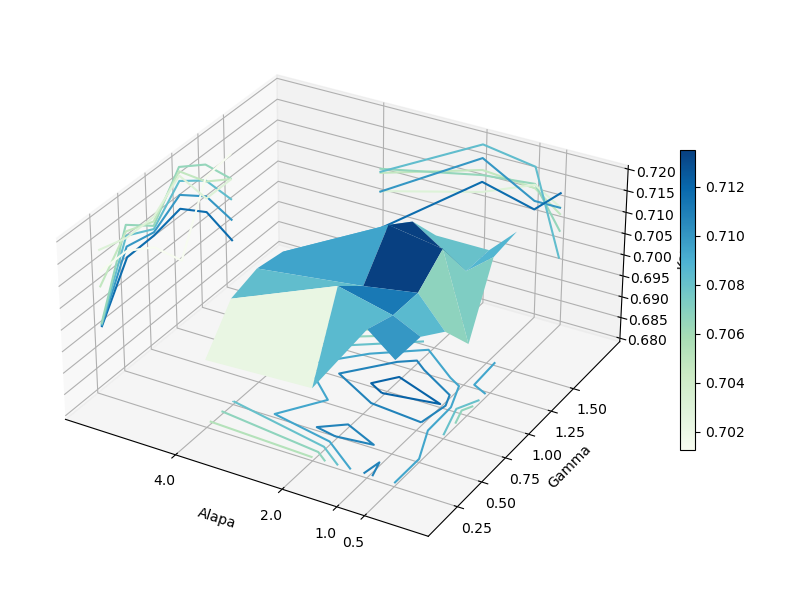

In [12]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
#Make data
Y = np.arange(0.25, 1.75, 0.25)
X = np.array([0.5, 1.0, 2.0, 4.0])
X, Y = np.meshgrid(X, Y)
Z = np.array(result_z(X, Y))

cs = ax1.plot_surface(X, Y, Z, rcount=200, ccount=200, cmap=cm.GnBu)
ax1.set_yticks([0.25,0.50,0.75,1.00,1.25,1.50])
ax1.set_xticks([0.5,1.0,2.0,4.0])
ax1.set_xlim(6, -0.5)
ax1.set_ylim(0, 2)
ax1.set_zlim(0.68, 0.72)
ax1.set_xlabel('Alapa')
ax1.set_ylabel('Gamma')
ax1.set_zlabel('Kappa')
CS1 = ax1.contour(X,Y,Z,zdir='z',offset=0.68, cmap=cm.GnBu)
fmt = {}
strs = ['f', 's', 't', 'fo', 'fi', 'si', 'se']
for l, s in zip(CS1.levels, strs):
    print(l)
    fmt[l] = s

# Label every other level using strings
ax1.clabel(CS1, CS1.levels[::2], inline=True, fmt=fmt, fontsize=100)
ax1.contour(X,Y,Z,zdir='x',offset=6, cmap=cm.GnBu)
ax1.contour(X,Y,Z,zdir='y',offset=2, cmap=cm.GnBu)


fig1.colorbar(cs, shrink = 0.5)
fig1.gca().set_box_aspect((2, 2, 1))
fig1.set_size_inches(8, 6)
plt.show()

C:\Users\15972\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=24 fp=0.000087 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\15972\AppData\Local\Temp\ipykernel_12828\2320341479.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax2 = Axes3D(fig2)


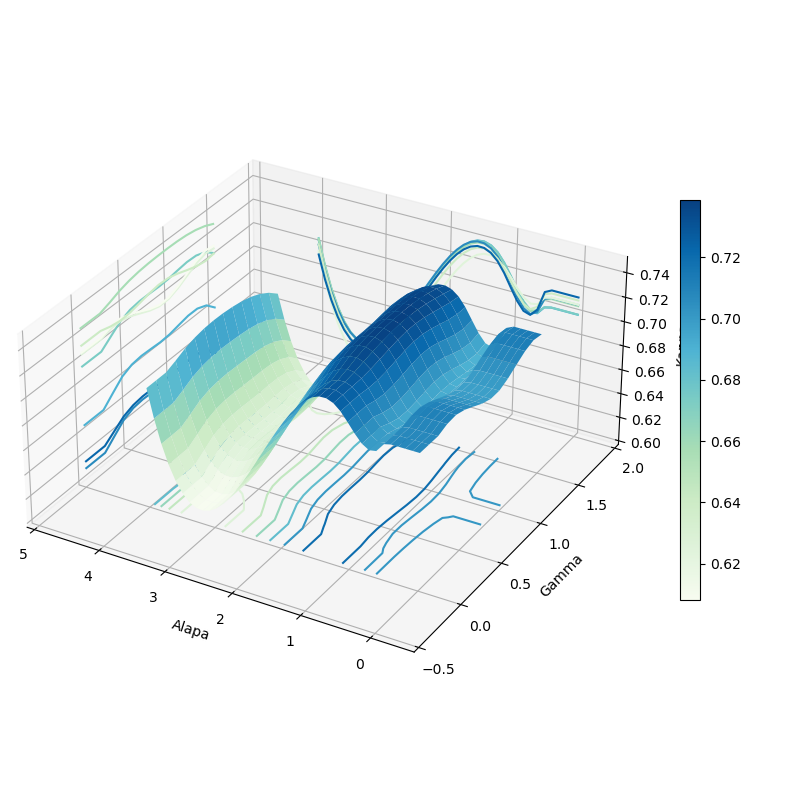

In [13]:
X = np.array([0.5, 1.0, 2.0, 4.0])
Y = np.arange(0.25, 1.75, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array(result_z(X, Y))


xnew, ynew = np.mgrid[0:4:40j, 0:1.5:15j]
tck = interpolate.bisplrep(X, Y, Z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)



fig2 = plt.figure()
ax2 = Axes3D(fig2)
cs = ax2.plot_surface(xnew, ynew, znew, cmap=cm.GnBu, rstride=1, cstride=1, alpha=None, antialiased=True)
ax2.set_xlabel('Alapa')
ax2.set_ylabel('Gamma')
ax2.set_zlabel('Kappa')
ax2.set_xlim(5, -0.5)
ax2.set_ylim(-0.5, 2)
ax2.set_zlim(0.6, 0.75)
ax2.contour(xnew, ynew,znew,zdir='z',offset=0.6, cmap=cm.GnBu)
ax2.contour(xnew, ynew,znew,zdir='x',offset=5, cmap=cm.GnBu)
ax2.contour(xnew, ynew,znew,zdir='y',offset=2, cmap=cm.GnBu)
fig2.colorbar(cs, shrink = 0.5)
fig2.gca().set_box_aspect((2, 2, 1))
fig2.set_size_inches(8, 8)
plt.show()


C:\Users\15972\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=24 fp=0.000087 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\15972\AppData\Local\Temp\ipykernel_12828\3769833373.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3 = Axes3D(fig3)


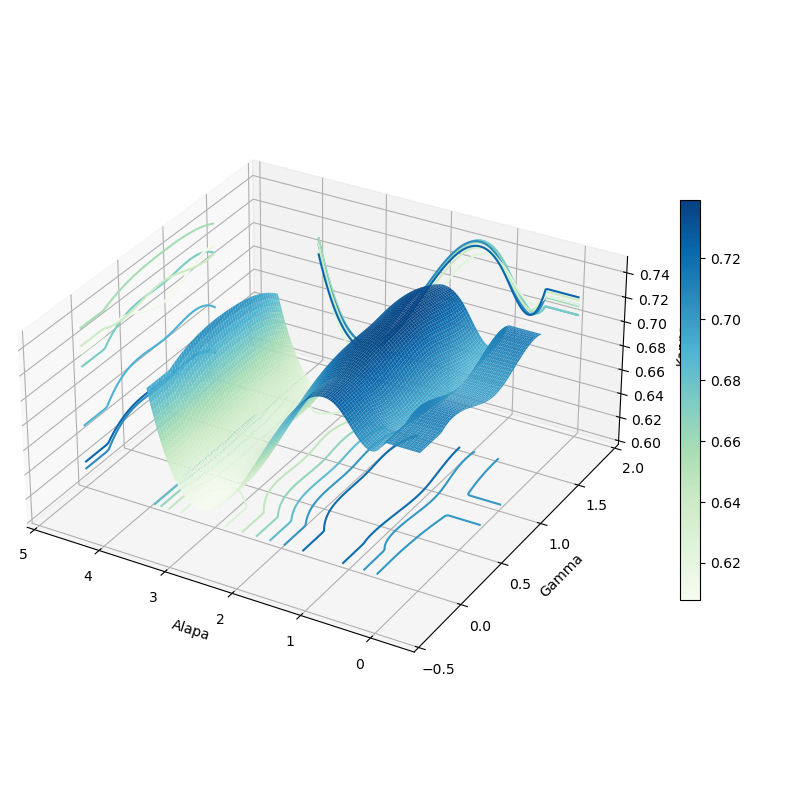

In [14]:
X = np.array([0.5, 1.0, 2.0, 4.0])
Y = np.arange(0.25, 1.75, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array(result_z(X, Y))


xnew, ynew = np.mgrid[0:4:160j, 0:1.5:60j]
tck = interpolate.bisplrep(X, Y, Z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)



fig3 = plt.figure()
ax3 = Axes3D(fig3)
cs = ax3.plot_surface(xnew, ynew, znew, cmap=cm.GnBu, rstride=1, cstride=1, alpha=None, antialiased=True)
ax3.set_xlabel('Alapa')
ax3.set_ylabel('Gamma')
ax3.set_zlabel('Kappa')
ax3.set_xlim(5, -0.5)
ax3.set_ylim(-0.5, 2)
ax3.set_zlim(0.6, 0.75)
ax3.contour(xnew, ynew,znew,zdir='z',offset=0.6, cmap=cm.GnBu)
ax3.contour(xnew, ynew,znew,zdir='x',offset=5, cmap=cm.GnBu)
ax3.contour(xnew, ynew,znew,zdir='y',offset=2, cmap=cm.GnBu)
fig3.colorbar(cs, shrink = 0.5)
fig3.gca().set_box_aspect((2, 2, 1))
fig3.set_size_inches(8, 8)
plt.show()
